In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None
np.set_printoptions(suppress=True)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替换sans-serif字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负数的负号显示问题

### 1 读取出excel数据、并查看前5组信息

In [3]:
data = pd.read_excel("京东数码数据.xlsx")
data.head()

,product_id(product_id),name(name),description(description),current_price(current_price),params(params),brand(brand),comments_count(comments_count),shop_name(shop_name),is_self_run(is_self_run),url(url),weight(weight),shopscores(shopscores),chooseattrs(chooseattrs),commentkinds(commentkinds),coupon(coupon),promotion(promotion),keyowrd(keyowrd)
0,40446628930,华为荣耀真无线蓝牙耳机原装FlyPods Pro运动跑步降噪双耳触控AI骨声纹传导音乐支持苹...,NaN,399.0,"[""{\""label\"":\""商品名称\"",\""value\"":\""华为（HUAWEI）CM...",华为（HUAWEI）,1217,鑫楚天数码专营店,否,http://item.jd.com/40446628930.html,108.00g,"[""{\""label\"":\""\"",\""value\"":\""\""}"",""{\""label\""...","[""{\""label\"":\""选择颜色\"",\""value\"":\""【青春版】铃兰白（Fly...","[""{\""label\"":\""全部评价\"",\""value\"":\""1300+\""}"",""{...",[],[],耳机
1,33680296063,索尼（SONY） WH-1000XM3 头戴式无线蓝牙降噪手机耳机国行WH-1000XM2升...,【索尼直供】索尼直接供货，正品保障，全国联保，统一开增值税电子发票【下单送好礼】赠送耳机支架...,2349.0,"[""{\""label\"":\""商品名称\"",\""value\"":\""索尼（SONY）WH-1...",索尼（SONY）,484,金索数码专营店,否,http://item.jd.com/33680296063.html,500.00g,"[""{\""label\"":\""\"",\""value\"":\""\""}"",""{\""label\""...","[""{\""label\"":\""选择颜色\"",\""value\"":\""黑色\""}""]","[""{\""label\"":\""全部评价\"",\""value\"":\""500+\""}"",""{\...",[],"[""{\""name\"":\""满减\"",\""content\"":\""满2499元减150元，包...",耳机
2,41386107370,百仕奇(BASIKE)无线蓝牙耳机入耳式双耳迷你隐形运动防水降噪触控5.0通用苹果小米华为专...,NaN,279.0,"[""{\""label\"":\""商品名称\"",\""value\"":\""百仕奇(BASIKE)无...",百仕奇（BASIKE）,327,百仕奇BASIKE旗舰店,是,http://item.jd.com/41386107370.html,12.00g,"[""{\""label\"":\""\"",\""value\"":\""\""}""]","[""{\""label\"":\""选择颜色\"",\""value\"":\""经典黑\""}""]","[""{\""label\"":\""全部评价\"",\""value\"":\""400+\""}"",""{\...",[],"[""{\""name\"":\""跨自营\\/店铺满减\"",\""content\"":\""每满100...",耳机
3,5760601,雷柏（Rapoo） VH150 背光游戏耳机 电竞耳机 电脑耳机 游戏耳麦 电脑耳麦 绝地求...,游戏鼠标新品发售！PMW3389高端引擎，高达16000DPI，99克轻量化设计（不含线），...,99.0,"[""{\""label\"":\""商品名称\"",\""value\"":\""雷柏VH150\""}"",...",雷柏（Rapoo）,44962,雷柏京东自营官方旗舰店,是,http://item.jd.com/5760601.html,0.595kg,"[""{\""label\"":\""\"",\""value\"":\""\""}""]","[""{\""label\"":\""选择颜色\"",\""value\"":\""VH150【头戴式初级】...","[""{\""label\"":\""全部评价\"",\""value\"":\""4.5万+\""}"",""{...",[],[],耳机
4,32071720244,魔浪/mifo O5真无线蓝牙耳机 plus尊享双耳迷你运动跑步防水超小隐形车载入耳式苹果安...,NaN,499.0,"[""{\""label\"":\""商品名称\"",\""value\"":\""魔浪（mifo）O5\""...",魔浪（mifo）,4808,名创数码专营店,否,http://item.jd.com/32071720244.html,200.00g,"[""{\""label\"":\""店铺星级\"",\""value\"":\""4.9\""}"",""{\""...","[""{\""label\"":\""选择颜色\"",\""value\"":\""深空灰-专业版（动铁耳机...","[""{\""label\"":\""全部评价\"",\""value\"":\""4800+\""}"",""{...","[""满1000减100""]",[],耳机


### 2 修改列名称，改为中文名称

In [4]:
data.rename(columns={'product_id(product_id)':'产品号(product_id)', 'name(name)':'产品名(name)','description(description)':'描述(description)',
                     'current_price(current_price)':'当前价格(current_price)','params(params)':'分类(params)','brand(brand)':'品牌(brand)',
                    'comments_count(comments_count)':'评论总数(comments_count)','shop_name(shop_name)':'店铺名(shop_name)',
                    'keyowrd(keyowrd)':'关键字(keyowrd）', 'promotion(promotion)':'促销(promotion)','chooseattrs(chooseattrs)':
                     '选择属性(chooseattrs)', 'commentkinds(commentkinds)':'评论类别(commentkinds)','weight(weight)':'重量(weight)',
                    'shopscores(shopscores)':'商铺评分(shopscores)', 'url(url)':'详情链接(url)','is_self_run(is_self_run)':
                    '自营(is_self_run)','coupon(coupon)':'优惠满减(coupon)'}, inplace = True)
data.tail()

,产品号(product_id),产品名(name),描述(description),当前价格(current_price),分类(params),品牌(brand),评论总数(comments_count),店铺名(shop_name),自营(is_self_run),详情链接(url),重量(weight),商铺评分(shopscores),选择属性(chooseattrs),评论类别(commentkinds),优惠满减(coupon),促销(promotion),关键字(keyowrd）
10917,26549342391,[宋祖儿同款]佳能（canon）EOS M50 微单反数码照相机vlog相机 黑色 15-4...,【晒单有礼】单反/微单购套餐视频晒单再送备用电池一套\n【三期免息】京东白条支付享三期免息\...,4188.0,"[""{\""label\"":\""商品名称\"",\""value\"":\""佳能（CANON）EOS...",佳能（CANON）,1485,实在人数码专营店,否,http://item.jd.com/26549342391.html,1.0kg,"[""{\""label\"":\""\"",\""value\"":\""\""}"",""{\""label\""...","[""{\""label\"":\""选择颜色\"",\""value\"":\""黑色 15-45STM日...","[""{\""label\"":\""全部评价\"",\""value\"":\""1400+\""}"",""{...","[""满2999减20"",""满4999减50""]",[],微单
10918,1892028,Apple iPad mini 4 平板电脑 7.9英寸（128G WLAN版/A8芯片/R...,7.9英寸iPad，性价比之选！自营品质保障！,2639.0,"[""{\""label\"":\""商品名称\"",\""value\"":\""AppleiPad mi...",Apple,627499,Apple产品京东自营旗舰店,是,http://item.jd.com/1892028.html,0.59kg,"[""{\""label\"":\""\"",\""value\"":\""\""}""]","[""{\""label\"":\""选择颜色\"",\""value\"":\""金\""}"",""{\""la...","[""{\""label\"":\""全部评价\"",\""value\"":\""62万+\""}"",""{\...",[],[],平板电脑
10919,6805712,【领券立减】Apple iPad 平板电脑 2018年新款9.7英寸（128G WLAN版/...,【领大额券立减270元，到手价低至2999！】自营品质保障！,3268.0,"[""{\""label\"":\""商品名称\"",\""value\"":\""AppleiPad\""}...",Apple,1128696,Apple产品京东自营旗舰店,是,http://item.jd.com/6805712.html,0.84kg,"[""{\""label\"":\""\"",\""value\"":\""\""}""]","[""{\""label\"":\""选择颜色\"",\""value\"":\""深空灰色\""}"",""{\...","[""{\""label\"":\""全部评价\"",\""value\"":\""113万+\""}"",""{...","[""满3000减270""]",[],平板电脑
10920,30206165608,索尼（SONY） ILCE-6300L/a6300/6400 微单相机/数码照相机 可录4K...,NaN,7030.0,"[""{\""label\"":\""商品名称\"",\""value\"":\""索尼（SONY） ILC...",索尼（SONY）,33,英德数码专营店,否,http://item.jd.com/30206165608.html,1.5kg,"[""{\""label\"":\""店铺星级\"",\""value\"":\""4.5\""}"",""{\""...","[""{\""label\"":\""选择颜色\"",\""value\"":\""A6300(E18-13...","[""{\""label\"":\""全部评价\"",\""value\"":\""30+\""}"",""{\""...",[],[],微单
10921,7019143,【领券立减】Apple iPad 平板电脑 2018年新款9.7英寸（128G WLAN版/...,【领大额券立减270元，到手价低至2999！】自营品质保障！,3268.0,"[""{\""label\"":\""商品名称\"",\""value\"":\""AppleiPad\""}...",Apple,1128696,Apple产品京东自营旗舰店,是,http://item.jd.com/7019143.html,0.83kg,"[""{\""label\"":\""\"",\""value\"":\""\""}""]","[""{\""label\"":\""选择颜色\"",\""value\"":\""金色\""}"",""{\""l...","[""{\""label\"":\""全部评价\"",\""value\"":\""113万+\""}"",""{...","[""满3000减270""]",[],平板电脑


### 3 数据处理

#### 3.1拓展列

In [5]:
data['商品评价'] = np.nan
data['商品评价等级']= np.nan
data['物流履约']= np.nan
data['物流履约等级']= np.nan
data['售后服务']= np.nan
data['售后服务等级']= np.nan
data['好评率'] = np.nan
data['晒图'] = np.nan
data['视频晒单'] = np.nan
data['追评'] = np.nan
data['销量当量'] = np.nan

#### 3.1 提取"商品评价","物流履约","售后服务"、 重量、评论等数据，并载入响应数据列

In [6]:
for i in range(10922):
    # 提取店铺评分
    
    if len(data['商铺评分(shopscores)'][i].split(',')) == 8:
            try:
                data['商品评价'][i]=float(data['商铺评分(shopscores)'][i].split(',')[3].strip('\\"value\\":\\"').strip('\\"}"]').split(' ')[0]) 
            except ValueError:
                data['商品评价'][i] = np.nan
            data['商品评价等级'][i]=data['商铺评分(shopscores)'][i].split(',')[3].strip('\\"value\\":\\"').strip('\\"}"]').split(' ')[1]
        
            try:
                data['物流履约'][i]= float(data['商铺评分(shopscores)'][i].split(',')[5].strip('\\"value\\":\\"').strip('\\"}"]').split(' ')[0])
            except ValueError:
                data['商品评价'][i] = np.nan
            data['物流履约等级'][i]=data['商铺评分(shopscores)'][i].split(',')[5].strip('\\"value\\":\\"').strip('\\"}"]').split(' ')[1] 
            try:
                data['售后服务'][i]=float(data['商铺评分(shopscores)'][i].split(',')[7].strip('\\"value\\":\\"').strip('\\"}"]').split(' ')[0])
            except ValueError:
                data['商品评价'][i] = np.nan
            data['售后服务等级'][i]=data['商铺评分(shopscores)'][i].split(',')[7].strip('\\"value\\":\\"').strip('\\"}"]').split(' ')[1]
            
            
            
    # 提取重量
    if isinstance(data['重量(weight)'][i] , float):
        continue
    elif data['重量(weight)'][i].endswith("kg"):
        data['重量(weight)'][i] = float(data['重量(weight)'][i][:-2]) * 1000
    else:
        data['重量(weight)'][i] = float(data['重量(weight)'][i][:-1])
    
    # 提取评论信息
    data['晒图'][i] = int(re.findall(r'\d',data['评论类别(commentkinds)'][i].split(',')[3])[0])
    data['视频晒单'][i] = int(re.findall(r'\d',data['评论类别(commentkinds)'][i].split(',')[5])[0])
    data['视频晒单'] = data['视频晒单'].apply(lambda x:int(x))
    data['追评'][i] = int(re.findall(r'\d',data['评论类别(commentkinds)'][i].split(',')[7])[0])
    try:
        good = int(re.findall(r'\d',data['评论类别(commentkinds)'][i].split(',')[9])[0])
        medium = int(re.findall(r'\d',data['评论类别(commentkinds)'][i].split(',')[11])[0])
        bad = int(re.findall(r'\d',data['评论类别(commentkinds)'][i].split(',')[13])[0])
        data['好评率'][i] = "%.2f" % (good / (good + medium + bad) * 100)
        data['销量当量'][i] = good+medium+bad
    except ZeroDivisionError:
        # 如果没有评论的就直接跳过
        pass

    

data['视频晒单'].fillna(0, inplace=True)
data['晒图'].fillna(0, inplace=True)
data['追评'].fillna(0, inplace=True)
data['视频晒单'] = data['视频晒单'].apply(lambda x:int(x))
data['晒图'] = data['晒图'].apply(lambda x:int(x))
data['追评'] = data['追评'].apply(lambda x:int(x))

ValueError: cannot convert float NaN to integer

##### 删除用作分析的列

In [28]:
data.drop(['商铺评分(shopscores)', '评论类别(commentkinds)'], axis=1, inplace=True)  

In [29]:
# 将促销信息
data['促销(promotion)'] = data['促销(promotion)'].replace([],0)
data[ '优惠满减(coupon)'] = data[ '优惠满减(coupon)'].replace([],0)

In [27]:
data.groupby(['店铺名(shop_name)'])['物流履约'].mean()

店铺名(shop_name)
1MORE万魔耳机官方旗舰店         9.590000
1more京东自营旗舰店                NaN
360京东自营旗舰店                  NaN
360儿童旗舰店               9.760000
ABY旗舰店                 9.960000
ADZ旗舰店                 9.481429
AFTERSHOKZ京东自营官方旗舰店         NaN
AFTERSHOKZ骨传导耳机旗舰店     9.990000
AKG京东自营旗舰店                  NaN
AMAZFIT京东自营官方旗舰店            NaN
AMAZFIT官方旗舰店           9.964000
APPLE翔合专卖店             9.939700
APPLE聚石专卖店             9.304000
AXONUS电子海外专营店               NaN
Ace-Pad梦蕾专卖店           8.310000
Apple产品京东自营旗舰店              NaN
Apple晨星泰合专卖店           9.770000
B&O京东自营旗舰店                  NaN
BEATS六悦专卖店             9.970000
BELUTTI旗舰店             9.220000
BGG海外专营店               9.036667
BIAZE影音京东自营旗舰店              NaN
BIM智能手表旗舰店             9.625000
BOE画屏自营旗舰店                  NaN
BOSE京东自营旗舰店                 NaN
BOSE旗舰店                9.202000
BOSII旗舰店               9.350000
Beats京东自营旗舰店                NaN
Beats旗舰店               9.960000
Bose家品专卖店              9.460000
                         

0                   鑫楚天数码专营店
1                    金索数码专营店
2               百仕奇BASIKE旗舰店
3                雷柏京东自营官方旗舰店
4                    名创数码专营店
5                    维肯数码专营店
6                    荣耀智能旗舰店
7                  唐麦京东自营旗舰店
8                    疯米自营旗舰店
9                   Beats旗舰店
10                      京东商城
11              飞利浦影音京东自营旗舰店
12                     品存旗舰店
13                 声丽京东自营旗舰店
14                 悦迪京东自营旗舰店
15                   光影数码专营店
16                   宜旭运动专营店
17                 蛇圣智能数码专营店
18                 OPPO酷炫专卖店
19                  契科无人机专营店
20                兰士顿京东自营旗舰店
21                JBL自营官方旗舰店
22                 小米京东自营旗舰店
23                   奇联数码旗舰店
24                     亿尚专营店
25                     穆奇旗舰店
26                   暖颐户外专营店
27                 瑞华精英数码专营店
28                  洲际通海外专营店
29               Cathay海外专营店
                ...         
10892         Apple产品京东自营旗舰店
10893    富士（FUJIFILM）京东自营旗舰店
10894            奥林巴斯京东自营旗舰店
10895         

##### 查看属性信息

In [9]:
data.columns.tolist()

['产品号(product_id)',
 '产品名(name)',
 '描述(description)',
 '当前价格(current_price)',
 '分类(params)',
 '品牌(brand)',
 '评论总数(comments_count)',
 '店铺名(shop_name)',
 '自营(is_self_run)',
 '详情链接(url)',
 '重量(weight)',
 '选择属性(chooseattrs)',
 '优惠满减(coupon)',
 '促销(promotion)',
 '关键字(keyowrd）',
 '商品评价',
 '商品评价等级',
 '物流履约',
 '物流履约等级',
 '售后服务',
 '售后服务等级',
 '好评率',
 '晒图',
 '视频晒单',
 '追评',
 '销量当量']

In [10]:
print('一共多少种产品参与了调查:',data['产品号(product_id)'].nunique())
print('一共多少类产品参与了调查:',data['关键字(keyowrd）'].nunique())
print('一共多少品牌参与了调查:',data['品牌(brand)'].nunique())
print('======' * 20)
print("价格区间情况：", data['当前价格(current_price)'].describe()) 
print('======' * 20)
print("销量区间情况：", data.describe()) 

一共多少种产品参与了调查: 10922
一共多少类产品参与了调查: 10
一共多少品牌参与了调查: 822
价格区间情况： count     10922.000000
mean       3545.739902
std        7711.985975
min          -1.000000
25%         269.000000
50%        1198.000000
75%        4079.000000
max      380000.000000
Name: 当前价格(current_price), dtype: float64
销量区间情况：        产品号(product_id)  当前价格(current_price)  评论总数(comments_count)  \
count     1.092200e+04         10922.000000          1.092200e+04   
mean      3.015430e+10          3545.739902          1.280245e+04   
std       2.142859e+10          7711.985975          7.633810e+04   
min       1.180910e+05            -1.000000          0.000000e+00   
25%       1.334717e+10           269.000000          5.100000e+01   
50%       3.054427e+10          1198.000000          4.760000e+02   
75%       4.130876e+10          4079.000000          3.075000e+03   
max       1.000047e+11        380000.000000          2.421807e+06   

              商品评价         物流履约         售后服务          好评率            晒图  \
count  

#### 分析价格出现问题

### 对评论表进行分析

In [31]:
commit = pd.read_excel("京东评论数据.xlsx")
commit.rename(columns={'name(name)': '产品号(name)', 
                    "kind(kind)": '产品类别(kind)',
                    'comments(comments)': '评论(comments)'}, inplace = True)
commit.tail()

,产品号(name),产品类别(kind),评论(comments)
19031,100001484839,游戏机,第一次接触p4晚上半夜下单第二天上午就到这速度是无敌的 同样 无敌的保鲜膜 晚上回家按...
19032,100001484839,游戏机,真不错，刚好遇到降价，直接入手，完了刺客信条奥德赛，和地平线，太满意了。
19033,100001484839,游戏机,既然国行可以解锁自然是入国行的，slim机能比想象中好，玩sony第一方游戏优化很好，底特律...
19034,100001484839,游戏机,已经开始使用，很好用，符合预期，很流畅，只是没有买到有优惠的挺可惜的，不错不错不错
19035,100001484839,游戏机,非常好！！！ 以前有个ps4有些游戏掉帧 换了这个pro一下子飞上天 战神4美滋滋 再...


In [52]:

data.to_excel('first.xlsx',index=False)

### 4 可视化分析
#### 4.1 数码产品价格分析

#### 4.2 各数码产品好评率分析

In [1]:
group_mean = data.groupby(data['关键字(keyowrd）'])["好评率"].mean()
fig = plt.figure(1,(12,8), 98)
plt.subplot(111, xlabel='产品种类', ylabel='好评率 %', title='各类数码产品好评率分布')
# plt.bar(data["销量当量"].groupby(data['关键字(keyowrd）']).mean())
group_mean.plot(kind='bar')
plt.grid()
plt.savefig("1.png")
plt.show()

NameError: name 'data' is not defined

#### 4.3各数码产品市场占比

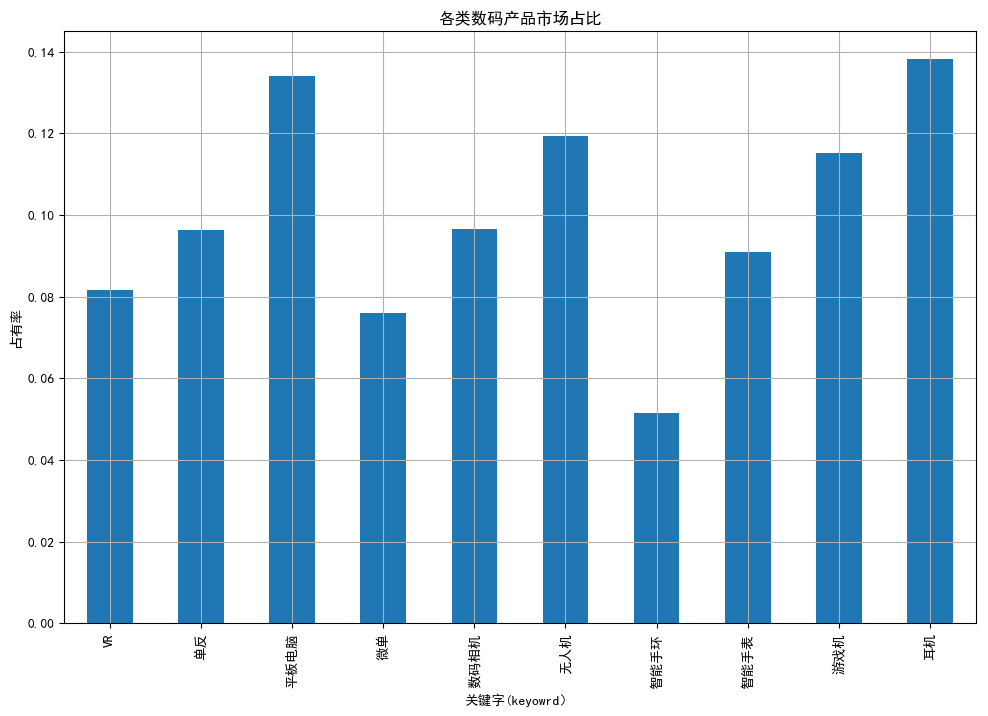

In [33]:

group_mean = data["销量当量"].groupby(data['关键字(keyowrd）']).sum()/  data["销量当量"].sum() 
fig = plt.figure(1,(12,8), 98)
plt.subplot(111, xlabel='产品种类', ylabel='占有率',title='各类数码产品市场占比')
# plt.bar(data["销量当量"].groupby(data['关键字(keyowrd）']).mean())
group_mean.plot(kind='bar')
plt.grid()
plt.show()

#### 4.4各数码产品的品牌对比

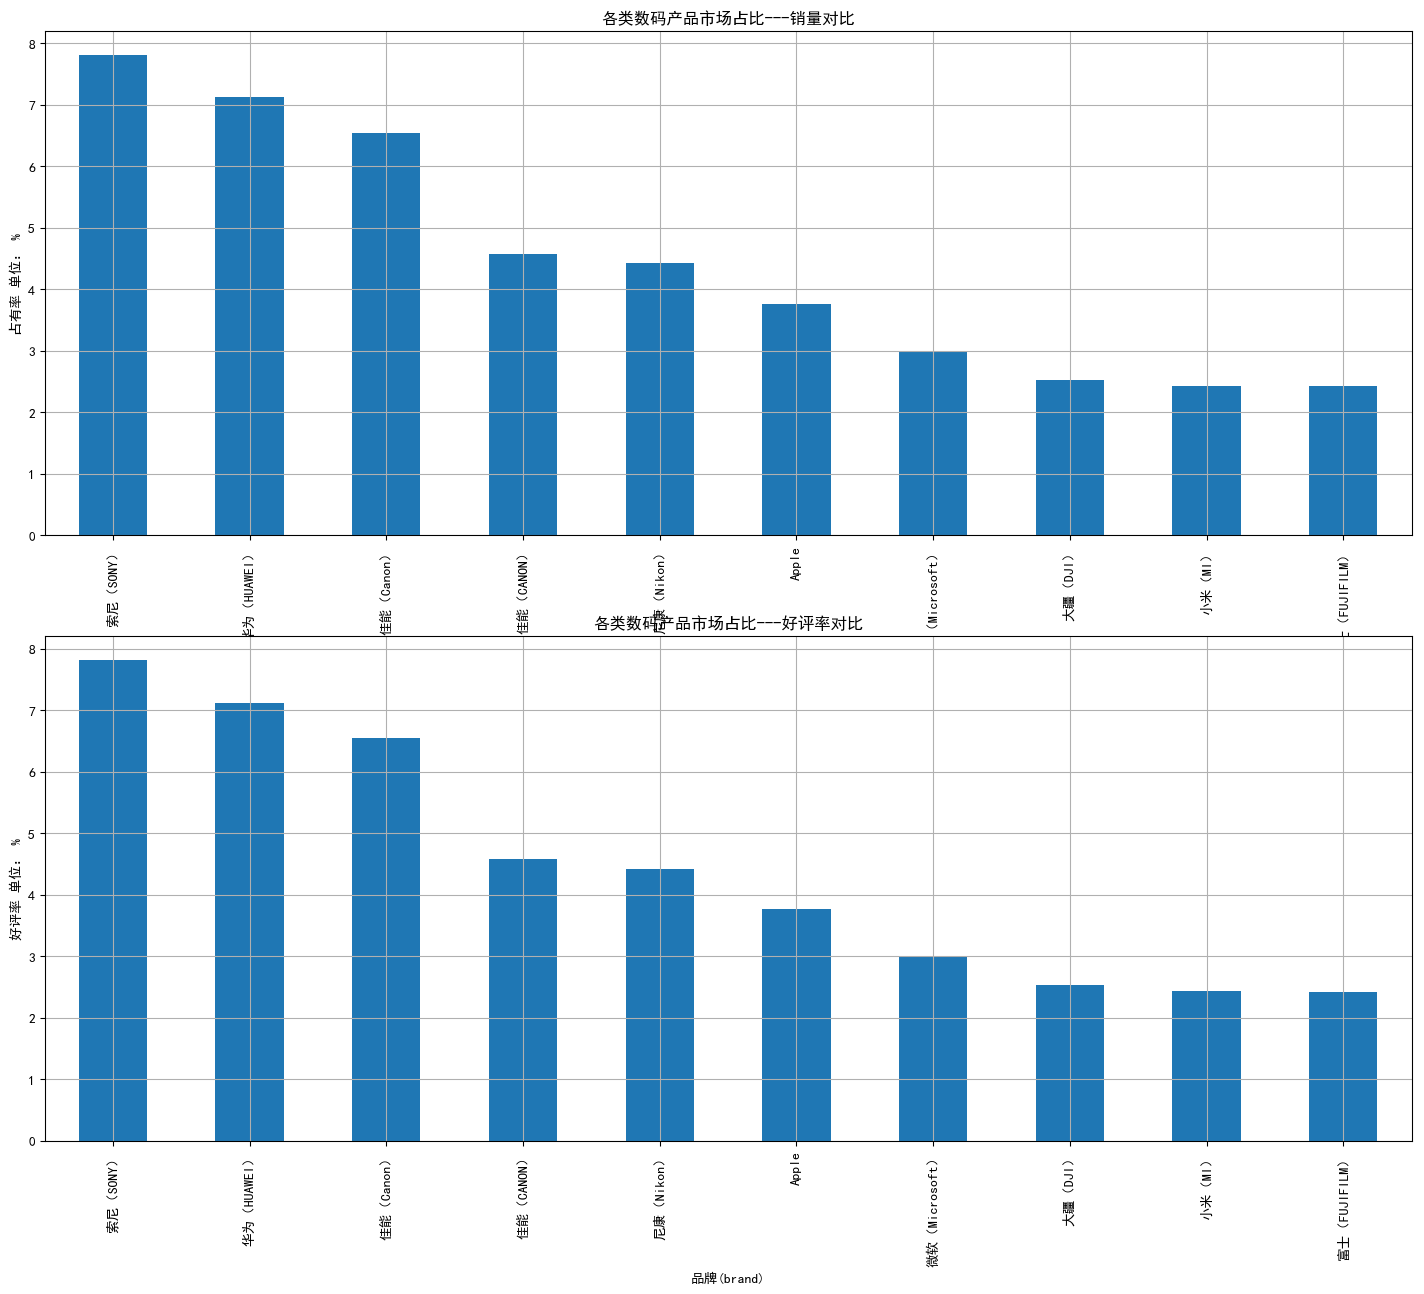

In [34]:

group_mean = data["销量当量"].groupby(data['品牌(brand)']).sum() / data["销量当量"].sum() * 100
group_mean = group_mean.sort_values(ascending = False)[:10]
fig = plt.figure(1,(18,15), 98)
plt.subplot(211, xlabel='品牌', ylabel='占有率 单位： %',title='各类数码产品市场占比---销量对比')
# plt.bar(data["销量当量"].groupby(data['关键字(keyowrd）']).mean())
group_mean.plot(kind='bar')
plt.grid()

plt.subplot(212, xlabel='品牌', ylabel='好评率 单位： %',title='各类数码产品市场占比---好评率对比')
group_rate = data["好评率"].groupby(data['品牌(brand)']).mean()
group_rate = group_mean.sort_values(ascending = False)[:10]
group_mean.plot(kind='bar')
plt.grid()
plt.show()

#### 4.5找到各数码产品的优势店铺

In [35]:
# 销量
data.groupby(['关键字(keyowrd）','店铺名(shop_name)'] )['销量当量'].sum().sort_values(ascending = False)[:50]

关键字(keyowrd）  店铺名(shop_name)     
平板电脑          APPLE翔合专卖店             1220.0
              科族数码专营店                1098.0
              Apple产品京东自营旗舰店          976.0
无人机           DJI大疆契科专卖店              829.0
单反            兴远摄影专营店                 760.0
数码相机          大有元亨数码旗舰店               581.0
无人机           Dwi模型旗舰店                543.0
微单            光影数码专营店                 494.0
数码相机          摄贸金广角官方旗舰店              482.0
游戏机           酷孩游戏机旗舰店                473.0
单反            尼康京东自营官方旗舰店             472.0
无人机           DJI大疆创新京东自营旗舰店          458.0
微单            富士（FUJIFILM）京东自营旗舰店     456.0
              SONY京东自营官方旗舰店           451.0
单反            光影数码专营店                 439.0
数码相机          兴远摄影专营店                 434.0
平板电脑          集合数码专营店                 434.0
单反            爱深博影像旗舰店                419.0
智能手表          Apple产品京东自营旗舰店          416.0
耳机            SONY京东自营官方旗舰店           415.0
平板电脑          千百回数码专营店                409.0
              永安电脑办公专营店               384.

#### 4.6京东自营的销售和评价和普通店铺的对比

In [36]:
# 自营(is_self_run)

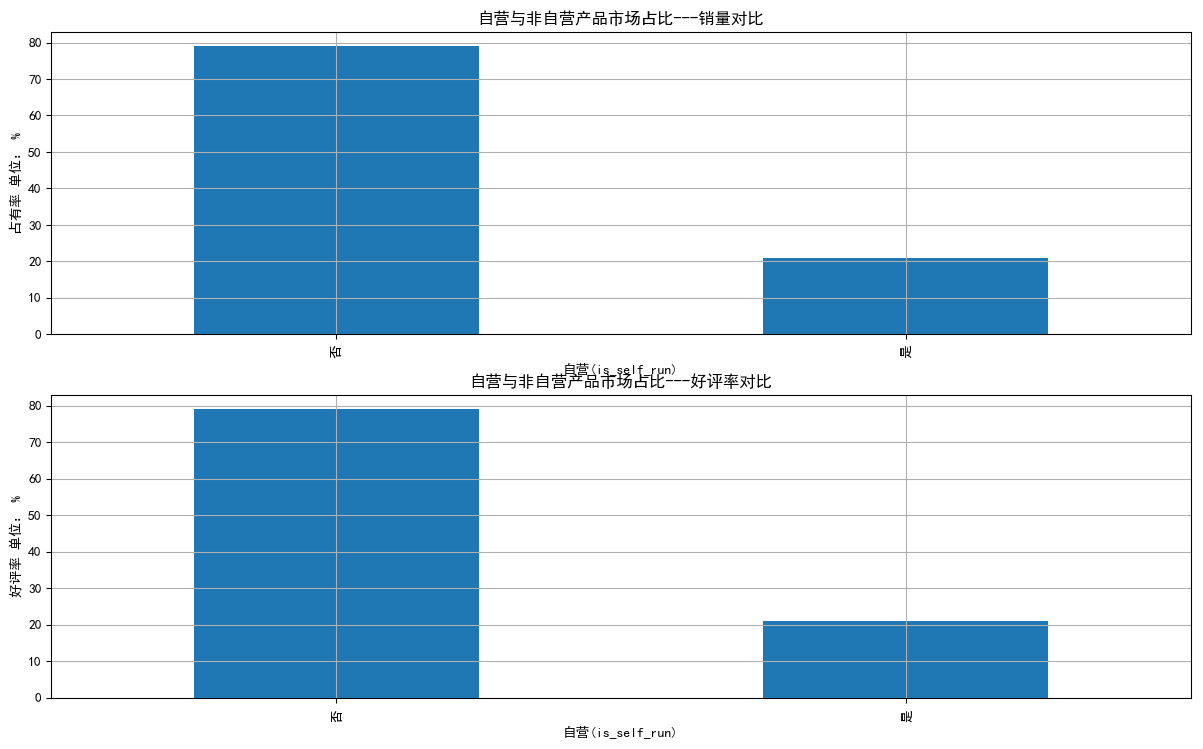

In [37]:
group_mean = data["销量当量"].groupby(data['自营(is_self_run)']).sum() / data["销量当量"].sum() * 100
group_mean = group_mean.sort_values(ascending = False)[:10]
fig = plt.figure(1,(15,9), 98)
plt.subplot(211, xlabel='是否自营', ylabel='占有率 单位： %',title='自营与非自营产品市场占比---销量对比')
# plt.bar(data["销量当量"].groupby(data['关键字(keyowrd）']).mean())
group_mean.plot(kind='bar')
plt.grid()

plt.subplot(212, xlabel='是否自营', ylabel='好评率 单位： %',title='自营与非自营产品市场占比---好评率对比')
group_rate = data["好评率"].groupby(data['自营(is_self_run)']).mean()
group_rate = group_mean.sort_values(ascending = False)
group_rate.plot(kind='bar')
plt.grid()
plt.show()

### 5 建立影响销量的回归模型
这里以好评+中评+差评作为销量的依据

### 缺失值情况

##### 最后再来看一下 缺失值的情况，看起来还蛮多的。。。头疼。。。

In [38]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
描述(description),2482,0.227248
物流履约,2375,0.217451
商品评价,2375,0.217451
售后服务,1858,0.170115
物流履约等级,1777,0.162699
商品评价等级,1777,0.162699
售后服务等级,1777,0.162699
销量当量,1336,0.122322
好评率,1336,0.122322
品牌(brand),297,0.027193


In [39]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'丢失率' :all_data_na})
missing_data.head(20)

,丢失率
描述(description),22.724776
物流履约,21.745102
商品评价,21.745102
售后服务,17.011536
售后服务等级,16.269914
物流履约等级,16.269914
商品评价等级,16.269914
销量当量,12.232192
好评率,12.232192
品牌(brand),2.719282


In [40]:
data.columns.tolist()

['产品号(product_id)',
 '产品名(name)',
 '描述(description)',
 '当前价格(current_price)',
 '分类(params)',
 '品牌(brand)',
 '评论总数(comments_count)',
 '店铺名(shop_name)',
 '自营(is_self_run)',
 '详情链接(url)',
 '重量(weight)',
 '选择属性(chooseattrs)',
 '优惠满减(coupon)',
 '促销(promotion)',
 '关键字(keyowrd）',
 '商品评价',
 '商品评价等级',
 '物流履约',
 '物流履约等级',
 '售后服务',
 '售后服务等级',
 '好评率',
 '晒图',
 '视频晒单',
 '追评',
 '销量当量']

In [41]:
values = {'描述(description)':0 }
data.fillna(value=values)
data.dropna(axis=0, how='any', inplace=True)
X = data[['自营(is_self_run)','当前价格(current_price)', '好评率','商品评价','物流履约', '售后服务']]
X['自营(is_self_run)'].replace('是',1, inplace = True) 
X['自营(is_self_run)'].replace( '否',0,inplace = True) 
Y = data['销量当量']


In [42]:
# one-hot
Bands = pd.get_dummies(data['品牌(brand)'])
X = pd.concat((X, Bands), axis=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
X_train

,自营(is_self_run),当前价格(current_price),好评率,商品评价,物流履约,售后服务,360,360儿童,720云（720yun）,7恋（SevenLove）,...,高巨创新,魅耳（Armonico）,魔浪（mifo）,魔锥（MODRILL）,鱼玥（YUYUE）,鲁咔贝卡（LUCBEK）,鸣动,麦肯齐（maikenqi）,麦肯齐（maikeqi）,黑加
4568,0,88.0,28.57,8.22,9.08,8.56,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2261,0,178.0,50.00,8.07,8.57,8.95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,88.0,100.00,8.61,9.52,8.80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5920,0,9490.0,100.00,9.04,9.53,8.96,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,0,3567.0,100.00,9.39,8.76,9.89,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5345,0,11949.0,100.00,8.99,9.63,9.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,15399.0,60.00,9.02,9.53,9.21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5817,0,19900.0,100.00,8.96,9.45,8.62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6334,0,4599.0,16.67,9.60,9.47,9.02,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6756,0,6788.0,83.33,9.23,9.86,9.26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
print("截距:",linreg.intercept_ )
print("系数:",linreg.coef_ )

截距: 28.721894356997954
系数: [-1.53766667e+09 -1.64698314e-05 -6.36803150e-02 -2.42122094e-01
 -2.77191859e-01  1.32400473e-01 -1.40685581e+01 -1.34034152e+01
 -1.67141009e+01 -1.31408289e+01 -8.44383371e+00 -1.62248352e+01
 -1.59811054e+01 -3.48367592e+00 -1.51063718e+01 -1.60385692e+01
 -1.41395543e+01  1.51755494e+02 -1.69013646e+01 -1.64620050e+01
 -1.85318082e+01  7.09329209e+00 -1.30176678e+01 -2.00993232e+01
 -1.51441757e+01 -6.38388867e+00 -1.58484847e+01 -1.69468077e+01
 -1.64828772e+01 -1.48133319e+01 -1.33052245e+01 -1.50568141e+01
 -7.45328909e+00 -1.14353963e+01 -1.51031879e+01 -1.97497531e+01
 -1.35689175e+01  4.76330151e+01 -1.37530121e+01 -1.21992661e+01
 -3.90239388e+00 -1.63944997e+01 -1.57304371e+01 -1.57883220e+01
 -1.84116051e+01 -1.36111973e+01 -1.42895560e+01 -1.56495010e+01
 -1.45692482e+01 -1.28064109e+01 -1.39051040e+01 -1.10862369e+01
 -1.62828755e+01 -1.58781796e+01 -1.10477714e+01 -1.94804637e+01
 -1.63163180e+01 -1.61631492e+01 -5.52392056e+00 -8.97370153e+0

我们需要评估我们的模型的好坏程度，对于线性回归来说，我们一般用均方差（Mean Squared Error, MSE）或者均方根差(Root Mean Squared Error, RMSE)在测试集上的表现来评价模型的好坏。

In [46]:
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 47.00664472541455
RMSE: 6.856139199681885


### 交叉验证

In [47]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, Y, cv=10)
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(Y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y, predicted)))

MSE: 1.3790789701670848e+16
RMSE: 117434193.0685899


 #### 这里画图真实值和预测值的变化关系，离中间的直线y=x直接越近的点代表预测损失越低。代码如下：

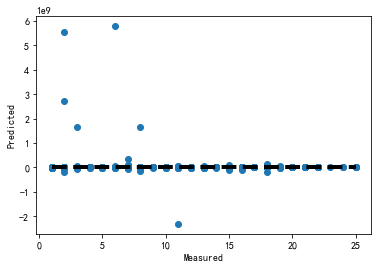

In [48]:
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [50]:

writer=pd.ExcelWriter('first.xlsx')
data.to_excel(writer,sheet_name='Data1',index=False)
